<a href="https://colab.research.google.com/github/Nsad9579/Ethics-Project/blob/main/episode2code_withOutPut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#let's import our packages
import numpy as np
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
#read the dataset
df=pd.read_csv("/content/all_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
df.head()
#Do you see what I see?
#yes it seems that TYPE and Committee columns are gathered like they are lists
#that's because of my mistakes in episode1 , no worry I corrected that part in code file!
# so you won't encounter this problem if you gather the data by yourself

,Unnamed: 0,Num,DATE,Title,TYPE,Committee
0,0,1,2022-03-10,INVESTIGATION THE THERAPEUTIC AND CLINICAL RES...,['Thesis'],['IR.TUMS.CHMC.REC']
1,1,2,2022-03-10,A Study of the Effect of the Time of In-hospit...,['Proposal'],['IR.TUMS.CHMC.REC']
2,2,3,2022-03-10,Evaluation of the relation between age and sur...,['Proposal'],['IR.TUMS.CHMC.REC']
3,3,4,2022-03-10,Attitude and beliefs of patients toward dental...,['Thesis'],['IR.MUI.RESEARCH.REC']
4,4,5,2022-03-09,Effect of COVID-19 epidemi on abundance of alc...,['Thesis'],['IR.ZBMU.REC']


In [17]:
# let's clean the data
df2=df.drop(columns=['Unnamed: 0', 'Num','DATE'])
#because we don't need them and they are not useful moreover they are not clean 
df3=df2.drop_duplicates(subset="Title")
#there are duplicates not because of the data itself but because of the way I crawl the site
# ethics.research.ac.ir update in times which I don't have any idea about it but the point is that 
#instead of adding the new studies to the end of the previous data ; they add to the begining of them
#let's save the cleaned data
df3=df3.dropna()
df3.to_csv("/content/all_data_df3.csv")

In [18]:
df3.shape

(157048, 3)

In [19]:
df3.isnull().sum()

Title        0
TYPE         0
Committee    0
dtype: int64

In [20]:
df3["TYPE"].value_counts()

['Thesis']      90035
['Proposal']    67013
Name: TYPE, dtype: int64

In [22]:
#draw the wordcloud
mask = np.array(Image.open("/content/mostlast.jpg"))

In [24]:
corpus = " ".join(str(cat).lower() for cat in df3.Title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1000, height = 1000,background_color ='white', 
                      random_state=1,collocations=False,stopwords = stopwords,
                      min_font_size =1, mask=mask).generate(corpus)

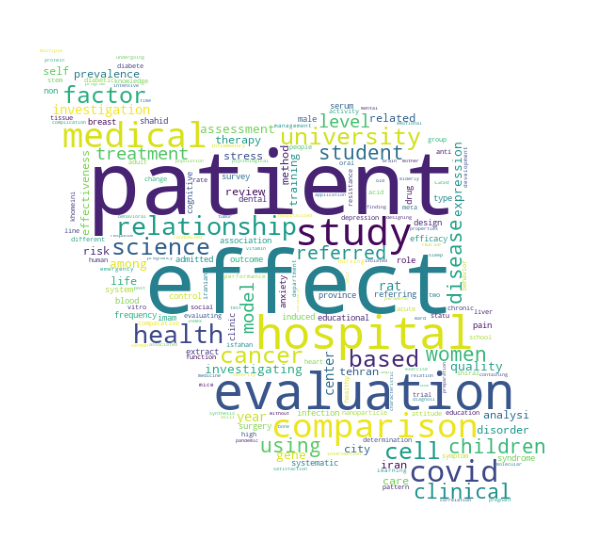

In [25]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [26]:
#and also let's take a look at data
df3.describe()

,Title,TYPE,Committee
count,157048,157048,157048
unique,157048,2,251
top,INVESTIGATION THE THERAPEUTIC AND CLINICAL RES...,['Thesis'],['IR.IUMS.REC']
freq,1,90035,5309
